# Running SCellBOW on simulated prostate cancer dataset

In [1]:
import SCellBOW as sb
import scanpy as sc
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/namratab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Import Dataset

In [2]:
# read source data
adata_source = sc.read("data/adata_source.h5ad")
adata_source

AnnData object with n_obs × n_vars = 1334 × 2000

In [3]:
# read target data
adata_target = sc.read("data/adata_target.h5ad")
adata_target

AnnData object with n_obs × n_vars = 836 × 2000
    obs: 'subtype'

In [4]:
# create a copy of target dataset for phenotype algebra
adata_test = adata_target.copy()
adata_test

AnnData object with n_obs × n_vars = 836 × 2000
    obs: 'subtype'

In [5]:
#load the survival data
adata_train = sc.read("data/adata_train.h5ad")
adata_train

/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 81 × 17981
    obs: 'subtype', 'time', 'status'
    var: 'n_cells'

# SCellBOW Pretrained model

In [6]:
# preprocess source dataset for pretraining
adata_source.var_names_make_unique()
sc.pp.filter_cells(adata_source, min_genes=10)
sc.pp.filter_genes(adata_source, min_cells=2)

sc.pp.normalize_total(adata_source, target_sum=1e4)
sc.pp.log1p(adata_source)
    
sc.pp.highly_variable_genes(adata_source, n_top_genes = 1000)
adata_source = adata_source[:, adata_source.var.highly_variable]

sc.pp.scale(adata_source, max_value=10)
adata_source

/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 1334 × 1000
    obs: 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [7]:
sb.SCellBOW_pretrain(adata_source, save_dir= "pca", vec_size=300, n_worker=1, iter=20)

[ 2022-12-30 11:05:15.683988 ] The path to save directory is ./pca/
[ 2022-12-30 11:05:15.684017 ] Creating the source model.
[ 2022-12-30 11:05:15.695078 ] Creating the corpus.


  0%|          | 0/1334 [00:00<?, ?it/s]

[ 2022-12-30 11:05:16.460787 ] Corpus created with size = 1334
[ 2022-12-30 11:05:16.460830 ] Tagging the corpora.
[ 2022-12-30 11:05:19.917635 ] All corpuses tagged with length 1334
[ 2022-12-30 11:05:19.917697 ] Inititalize the SCellBOW source model.
[ 2022-12-30 11:05:19.917706 ] INFO - SCellBOW: vector size = 300
[ 2022-12-30 11:05:19.917716 ] INFO - SCellBOW: initial learning rate = 0.025
[ 2022-12-30 11:05:19.917729 ] INFO - SCellBOW: min_alpha = 0.00025
[ 2022-12-30 11:05:19.917739 ] INFO - SCellBOW: min_count = 1
[ 2022-12-30 11:05:19.917748 ] INFO - SCellBOW: number of cpu = 1
[ 2022-12-30 11:05:19.918177 ] Building vocabulary.
[ 2022-12-30 11:05:20.078269 ] Vocabulary built.
[ 2022-12-30 11:05:20.078291 ] Start training the neural network.
[ 2022-12-30 11:05:59.156754 ] Training SCellBOW source model finished.
[ 2022-12-30 11:05:59.162554 ] Model saved in directory  ./pca/
[ 2022-12-30 11:05:59.179103 ] Source model created!


# SCellBOW Clustering

In [8]:
# preprocess target dataset for clustering 
adata_target.var_names_make_unique()
sc.pp.filter_cells(adata_target, min_genes=10)
sc.pp.filter_genes(adata_target, min_cells=2)

sc.pp.normalize_total(adata_target, target_sum=1e4)
sc.pp.log1p(adata_target)
    
sc.pp.highly_variable_genes(adata_target, n_top_genes = 1000)
adata_target.raw = adata_target
adata_target = adata_target[:, adata_target.var.highly_variable]

sc.pp.scale(adata_target, max_value=10)

adata_target

/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 836 × 1000
    obs: 'subtype', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [9]:
# invoke SCellBOW cluster
adata_output = sb.SCellBOW_cluster(adata_target,'pca').run()

[ 2022-12-30 11:05:59.244904 ] The path to save directory is ./pca/
[ 2022-12-30 11:05:59.245006 ] Begin SCellBOW: transfer learning.
MinMaxScaler(feature_range=(1, 10))
[ 2022-12-30 11:05:59.257085 ] Creating the corpus.


  0%|          | 0/836 [00:00<?, ?it/s]

[ 2022-12-30 11:05:59.729087 ] Tagging the corpora for transfer learning.
[ 2022-12-30 11:06:02.007222 ] All corpuses tagged with length = 836
[ 2022-12-30 11:06:02.007295 ] Updating the vocabulary.
[ 2022-12-30 11:06:02.127024 ] Vocabulary updated.
[ 2022-12-30 11:06:02.127047 ] Start transfer learning on the neural network.
[ 2022-12-30 11:06:53.060211 ] Weights of the neural network calibrated.
[ 2022-12-30 11:06:53.060281 ] Start infering the vectors for target dataset.


  0%|          | 0/836 [00:00<?, ?it/s]

[ 2022-12-30 11:07:32.282470 ] Embedding created with shape : (836, 300)
[ 2022-12-30 11:07:32.282534 ] Start leiden clustering at resolution: 1.0


2022-12-30 11:07:34.524571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-30 11:07:34.524599: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[ 2022-12-30 11:07:38.210264 ] SCellBOW clustering has been successful!


In [10]:
adata_output

AnnData object with n_obs × n_vars = 836 × 1000
    obs: 'subtype', 'n_genes', 'clusters_1.0'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'leiden'
    obsm: 'SCellBOW_embed', 'X_embed', 'X_umap'
    obsp: 'distances', 'connectivities'

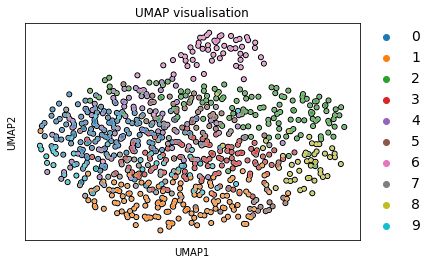

In [11]:
#visualisation of leiden clusters
resolution = 1.0
with plt.rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata_output, 
               color='clusters_'+str(resolution), 
               add_outline=True, 
               legend_fontsize=14, 
               legend_fontoutline=2,
               title='UMAP visualisation', 
               size = 50,
               palette=plt.rcParams["axes.prop_cycle"],
              )

# SCellBOW Phenotype algebra

In [12]:
#invoke phenotype algebra
adata_test.obs =  adata_output.obs
median_score, predicted_score=sb.SCellBOW_algebra(adata_test,adata_train,"pca",
                    type='clusters_1.0',
                    bootstrap_samples=10,n_top_features=1000).run()

[ 2022-12-30 11:07:38.389269 ] The path to save directory is pca/
[ 2022-12-30 11:07:38.389317 ] Begin SCellBOW: phenotype algebra.


/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/SCellBOW/SCellBOW.py:308: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['type'] = y
/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


[ 2022-12-30 11:07:38.719218 ] Begin creating pseudobulk on clusters_1.0
[ 2022-12-30 11:07:38.839260 ] Shape of pseudobulk by individual type: (10, 1999)
[2022-12-30 11:07:38.925478]Common gene between survival and target data=675
[ 2022-12-30 11:07:38.946575 ] Begin transfer learning.
[ 2022-12-30 11:07:38.954744 ] The path to save directory is ./pca//
[ 2022-12-30 11:07:38.954758 ] Begin SCellBOW: transfer learning.
MinMaxScaler(feature_range=(1, 10))
[ 2022-12-30 11:07:38.960945 ] Creating the corpus.


/home/namratab/anaconda3/envs/namrata/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


  0%|          | 0/92 [00:00<?, ?it/s]

[ 2022-12-30 11:07:39.069874 ] Tagging the corpora for transfer learning.
[ 2022-12-30 11:07:39.576797 ] All corpuses tagged with length = 92
[ 2022-12-30 11:07:39.576862 ] Updating the vocabulary.
[ 2022-12-30 11:07:39.618657 ] Vocabulary updated.
[ 2022-12-30 11:07:39.618679 ] Start transfer learning on the neural network.
[ 2022-12-30 11:07:53.288118 ] Weights of the neural network calibrated.
[ 2022-12-30 11:07:53.288187 ] Start infering the vectors for target dataset.


  0%|          | 0/92 [00:00<?, ?it/s]

[ 2022-12-30 11:08:03.479903 ] Embedding created with shape : (92, 300)
[ 2022-12-30 11:08:03.479954 ] Start leiden clustering at resolution: 1.0
[ 2022-12-30 11:08:04.004098 ] SCellBOW clustering has been successful!
[ 2022-12-30 11:08:04.007121 ] Finished transfer learning.
[ 2022-12-30 11:08:04.010285 ] Start training the phenotype algebra model.
[ 2022-12-30 11:08:04.010302 ] INFO - SCellBOW: Samples in survival data shape = 81
[ 2022-12-30 11:08:04.010315 ] INFO - SCellBOW: Pseudobulk samples in target data = 11
[ 2022-12-30 11:08:04.010325 ] INFO - SCellBOW: Descriptor class = clusters_1.0
[ 2022-12-30 11:08:04.010335 ] INFO - SCellBOW: Train:test split = 80:20


  0%|          | 0/10 [00:00<?, ?it/s]

[ 2022-12-30 11:08:04.021418 ] Epoch 0/10
[ 2022-12-30 11:08:06.071509 ] Epoch 1/10
[ 2022-12-30 11:08:07.885192 ] Epoch 2/10
[ 2022-12-30 11:08:09.755788 ] Epoch 3/10
[ 2022-12-30 11:08:11.574694 ] Epoch 4/10
[ 2022-12-30 11:08:13.482561 ] Epoch 5/10
[ 2022-12-30 11:08:15.449917 ] Epoch 6/10
[ 2022-12-30 11:08:17.314548 ] Epoch 7/10
[ 2022-12-30 11:08:19.194438 ] Epoch 8/10
[ 2022-12-30 11:08:21.075181 ] Epoch 9/10
[ 2022-12-30 11:08:22.988312 ] Risk score prediction complete.
[ 2022-12-30 11:08:22.988418 ] Calculate median risk score.
[ 2022-12-30 11:08:22.988938 ] SCellBOW phenotype algebra is complete!


In [13]:
predicted_score

,pseudobulk,pseudobulk - (0),pseudobulk - (1),pseudobulk - (2),pseudobulk - (3),pseudobulk - (4),pseudobulk - (5),pseudobulk - (6),pseudobulk - (7),pseudobulk - (8),pseudobulk - (9)
0,28.105333,30.454500,27.001000,32.384167,31.399500,28.622333,30.687667,34.102333,33.378167,30.210500,33.238000
1,27.230000,37.187167,32.915333,36.909333,30.996667,33.119833,34.837833,32.260167,40.050167,35.367500,33.657500
2,27.557000,28.636333,32.592833,31.305333,32.877000,29.170000,30.318833,32.971333,33.181333,30.980167,29.099333
3,27.399500,31.172167,28.509167,33.432333,26.266500,29.658167,27.473833,31.805000,30.210000,26.171500,30.328000
4,29.273333,34.103000,33.725000,32.688000,33.407333,36.995500,30.715833,33.918000,36.461500,32.572500,32.366667
5,29.322500,33.622667,32.416000,38.473500,30.018167,31.508000,33.960833,36.306167,36.851667,34.606167,36.175333
6,23.256667,24.804833,24.738000,31.120000,29.138833,24.319000,29.316167,33.182167,28.420833,28.824833,29.670500
7,23.839500,27.480667,25.334000,29.358333,24.208000,23.847833,25.820500,26.166500,27.677000,24.756000,27.860833
8,23.940167,23.435333,25.515667,27.792667,23.653167,25.165167,24.548667,26.107500,27.752667,24.452500,28.192167
9,27.466000,32.649000,29.479833,33.784667,32.426500,29.115833,31.977167,34.426167,34.019000,31.410000,32.655167


In [14]:
median_score

pseudobulk          27.432750
pseudobulk - (0)    30.813333
pseudobulk - (1)    28.994500
pseudobulk - (2)    32.536083
pseudobulk - (3)    30.507417
pseudobulk - (4)    29.142917
pseudobulk - (5)    30.503250
pseudobulk - (6)    33.076750
pseudobulk - (7)    33.279750
pseudobulk - (8)    30.595333
pseudobulk - (9)    31.347333
dtype: float64

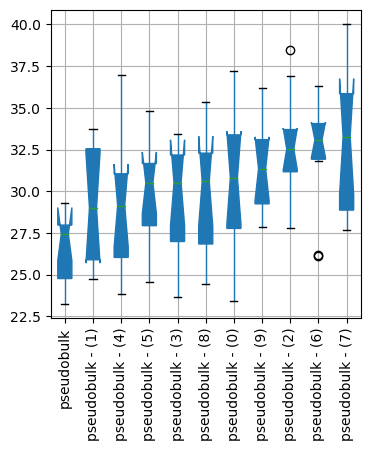

In [15]:
median_score.sort_values(ascending=True, inplace=True)
predicted_score = predicted_score[median_score.index]
plt.figure(figsize=(4,4))
predicted_score.boxplot(patch_artist=True, notch=True)
plt.xticks(rotation=90, size=10)
plt.show()